In [18]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

import pandas as pd

In [53]:
### CONSTANTS ####
sample_rate = 44100

def normalize(output_data):
    max_original = 30000
    max_values = np.amax(np.absolute(output_data))
    scalar = (max_original / max_values)
    print("Scalar:", scalar)
    
    for i in range(len(output_data)):
        output_data[i] = scalar * output_data[i]

    return output_data

def filt(arr, order, frequency, filter_type):

    Wn = frequency
    sos = signal.butter(order,Wn,filter_type,fs=sample_rate, output="sos")
    filtered = signal.sosfilt(sos, arr)    
    
    return filtered

Scalar: 30000.000045


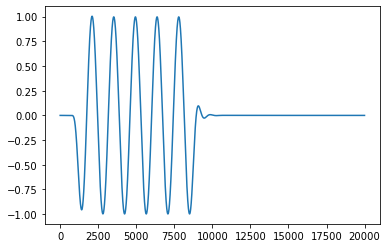

In [63]:
table = pd.read_csv("./resonator.csv")
input_voltage_values = table["Signal V"].to_numpy()
# output_voltage_values = table["Output Voltage"].to_numpy()

input_voltage_lowpassed = filt(input_voltage_values, order=4, frequency=60, filter_type="lowpass")
plt.plot(input_voltage_lowpassed)
# plt.plot(input_voltage_values)

### Processing ###

# output = normalize(output_voltage_values)
input_v = normalize(input_voltage_values)

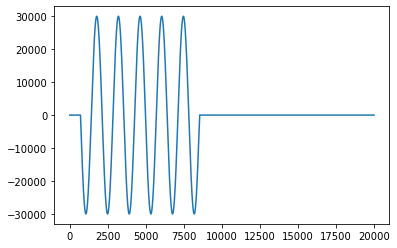

In [28]:
plt.plot(input_voltage_values)

In [66]:
wavfile.write("output.wav", 44100, output)
wavfile.write("input.wav", 44100, input_v)

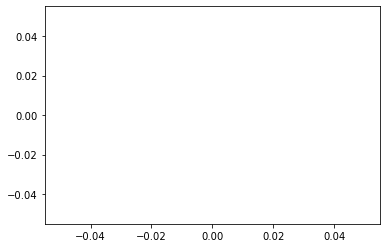

In [35]:
plt.plot(input_v)